In [12]:
import proplot as plot
import numpy as np
import matplotlib.pyplot as plt

## Swenson2012

https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2012JD018178

In addition to accurately representing unresolved processes, parameterizations developed for use in Earth System Models like CESM are constrained by the need for computational efficiency and numerical stability. Based on these criteria, we have developed the following empirically derived expression that relates SCF to the dimensionless snow water equivalent during melting events

$$
F=1-\left[\frac{1}{\pi} \operatorname{acos}\left(2 \frac{W}{W_{\max }}-1\right)\right]^{N_{\text {melt}}}
$$

where Nmelt is a parameter that controls the shape of the snow-covered area F. As shown below, the inverse cosine function possesses the flexibility to capture the spread in snow depth–SCF trajectories shown in Figure 8, as well as having numerical properties that facilitate an internally consistent description of snow depth, density and SCF. An additional benefit of this SCF parameterization is its com- putationally efficient closed form. [30] Figure 9 shows depletion curves defined by equation (4) for values ofNmelt ranging from 0.25 to 8.0. The depletion curves in Figure 9 demonstrate that equation (4) spans the full range of possible SCF trajectories. By vary- ing Nmelt, the new parameterization can model both the steep depletion curves implied in Figure 8 (middle) and the more concave curves depicted in Figure 8 (bottom). [31] While the shape parameter Nmelt is not physically based, and therefore cannot be directly measured, the varia- tion ofthe depletion curves implied by Figure 8 suggests that it should be a function of topographic variability. Figure 10 shows the result of estimating SCF from SNODAS snow depth data using equation (4). The shape parameter, Nmelt, is determined from the standard deviation of topography, stopo,by

$$
N_{\text {melt}}=\frac{200}{\sigma_{\text {topo}}}
$$

Thus, depletion curves for regions with high vari- ability have lower values ofNmelt, and those for regions with low variability have higher values of Nmelt. Although the spread of the predicted histograms (Figure 10) is less than the spread of the observations shown in Figure 8 (top), the qualitative agreement is good. The discrepancies are not surprising because topographic variability is not the only determinant of variability in snow melt [Clark et al., 2011; Liston, 2004], and both observational data sets contain errors. Despite these issues, the parameterization captures the different shapes of the depletion curves for regions of low and high topographic variability.



## Accumulation

In [52]:
SL12_accu(3, 0.4, 0.1)

0.5800000000000001

In [51]:
def SL12_accu(w, f, k):
    s = np.minimum(1, k*w)
    f = 1 - (1 - s)*(1 - f)
    return f

In [46]:
f_accu_02 = [0]
f_accu_10 = [0]
f_accu_18 = [0]
f_accu_26 = [0]

snowfalls = [10]*100
SD = [0]

for i, snowfall in enumerate(snowfalls):
    f_accu_02.append(SL12_accu(snowfall, f_accu_02[i], 0.02))
    f_accu_10.append(SL12_accu(snowfall, f_accu_10[i], 0.10))
    f_accu_18.append(SL12_accu(snowfall, f_accu_18[i], 0.18))
    f_accu_26.append(SL12_accu(snowfall, f_accu_26[i], 0.26))
    SD.append(SD[i]+snowfall/100)
    

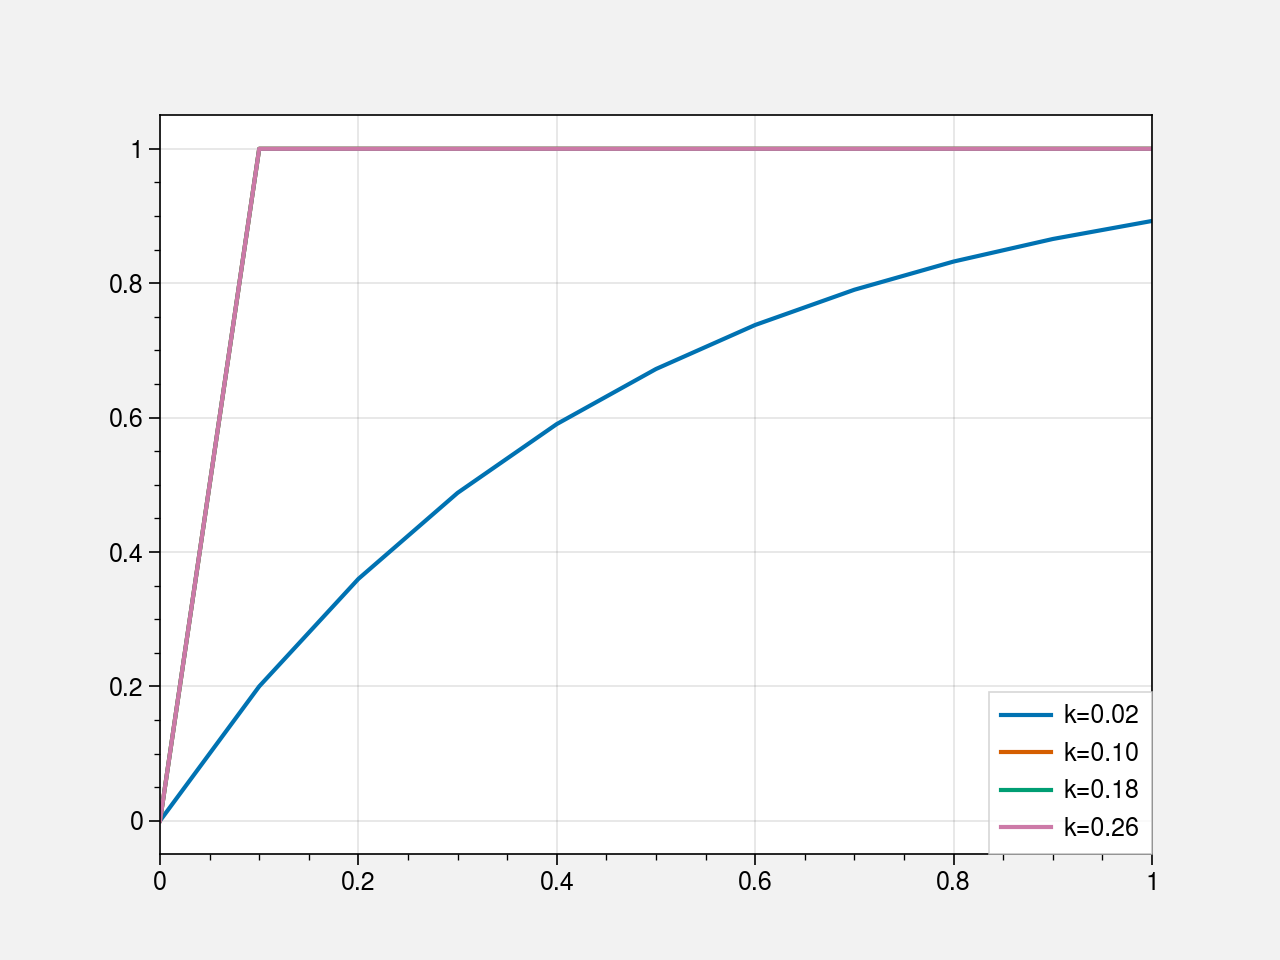

In [47]:
plt.plot(SD, f_accu_02, label='k=0.02')
plt.plot(SD, f_accu_10, label='k=0.10')
plt.plot(SD, f_accu_18, label='k=0.18')
plt.plot(SD, f_accu_26, label='k=0.26')

plt.xlim(0, 1)
plt.legend()

In [48]:
def SL12_accu(w, f, k):
    s = np.tanh(k*w)
    f = 1 - (1 - s)*(1 - f)
    return f

In [49]:
f_accu_02 = [0]
f_accu_10 = [0]
f_accu_18 = [0]
f_accu_26 = [0]

snowfalls = [10]*100
SD = [0]

for i, snowfall in enumerate(snowfalls):
    f_accu_02.append(SL12_accu(snowfall, f_accu_02[i], 0.02))
    f_accu_10.append(SL12_accu(snowfall, f_accu_10[i], 0.10))
    f_accu_18.append(SL12_accu(snowfall, f_accu_18[i], 0.18))
    f_accu_26.append(SL12_accu(snowfall, f_accu_26[i], 0.26))
    SD.append(SD[i]+snowfall/100)
    

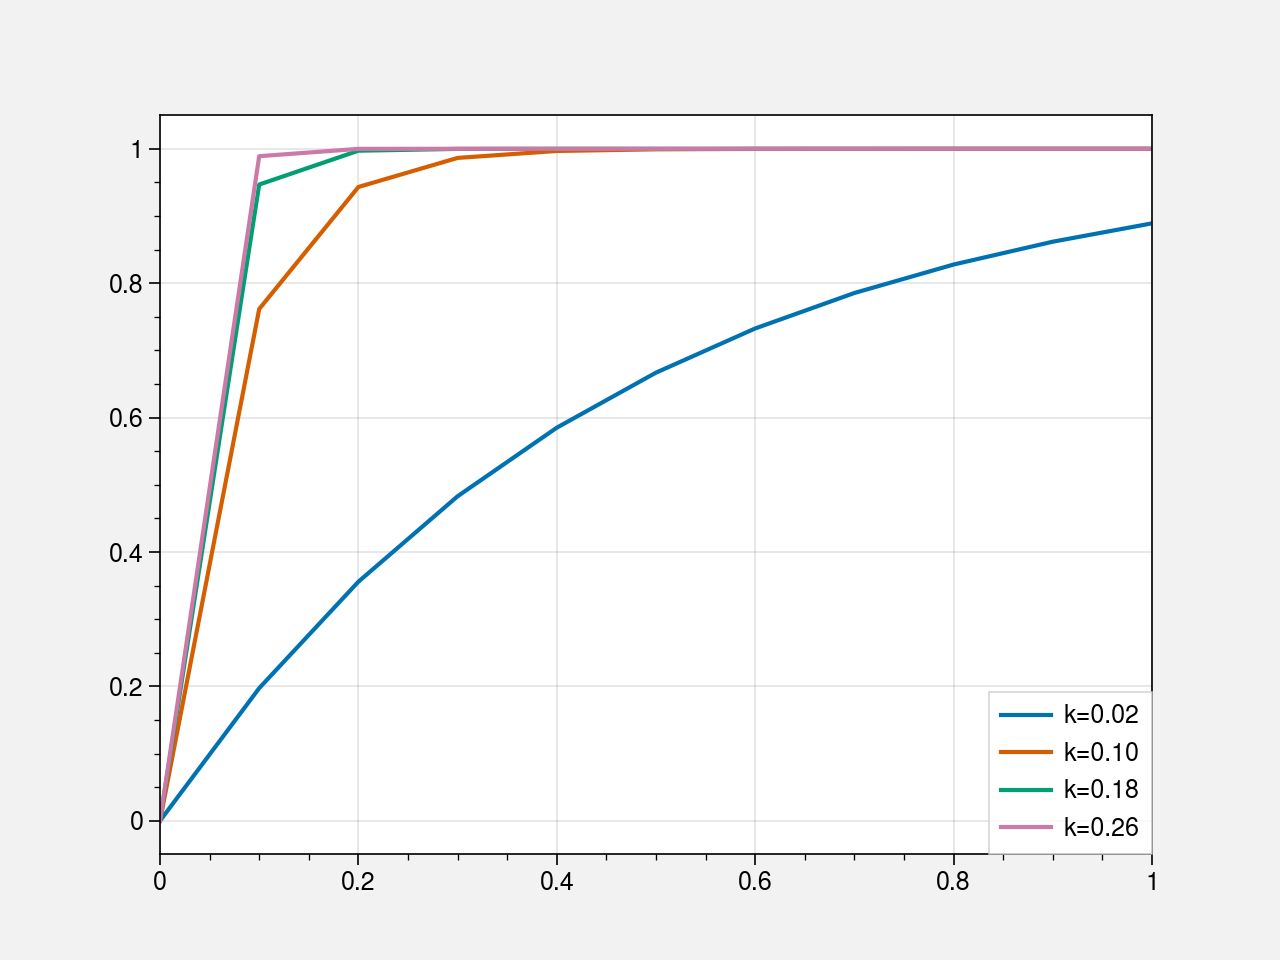

In [50]:
plt.plot(SD, f_accu_02, label='k=0.02')
plt.plot(SD, f_accu_10, label='k=0.10')
plt.plot(SD, f_accu_18, label='k=0.18')
plt.plot(SD, f_accu_26, label='k=0.26')

plt.xlim(0, 1)
plt.legend()

## Depletion

In [2]:
np.arccos(1)

0.0

In [3]:
def F_S12(SWE, SWE_max, sigma_topo):
     return 1 - ( 1/np.pi * np.arccos( 2*SWE/SWE_max - 1 ) )**(200/sigma_topo)

In [4]:
SWE = plot.arange(0,1,0.01) # grid cell average snow depth [m]
SWE_max = 1
sigma_topo = 0

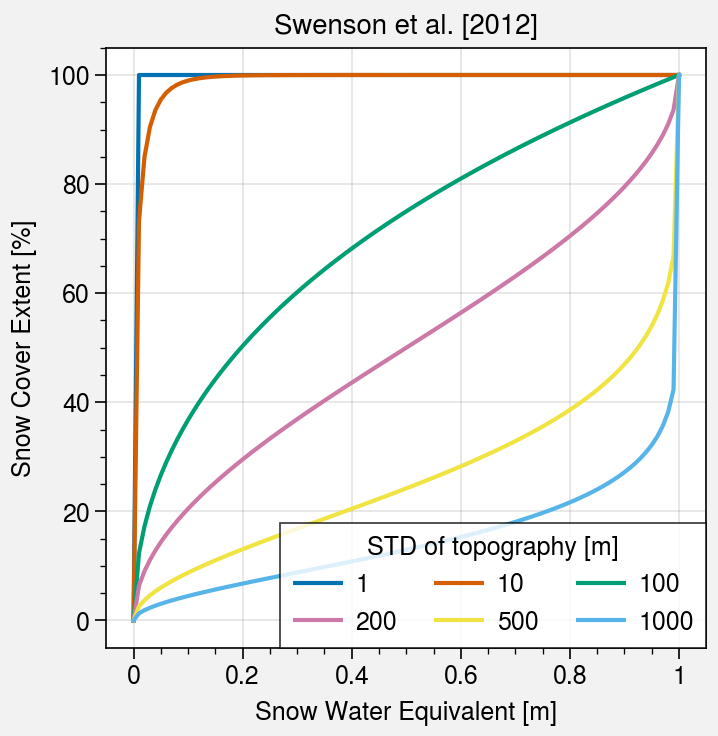

In [5]:
sigma_topo_list = [1, 10, 100, 200, 500, 1000]

fig, axs = plot.subplots(axwidth=3)

axs.format(
    xlabel='Snow Water Equivalent [m]',
    ylabel='Snow Cover Extent [%]',
    title='Swenson et al. [2012]'
)

hs = []
for sigma_topo in sigma_topo_list:
    y = F_S12(SWE, SWE_max, sigma_topo)*100
    x = SWE
    h = axs[0].plot(x, y, label=sigma_topo)
    hs.append(h)

axs.legend(hs, label='STD of topography [m]')

## Try to include back the density!

$$
SWE = z \times \frac{\rho_{snow}}{1000}
$$

In [179]:
2*d*(1000-rho_snow)/(5*800) - 1

array([-1.    , -0.9975, -0.995 , ...,  1.495 ,  1.4975,  1.5   ])

In [174]:
def F_S12_density(d, rho_snow, sigma_topo):
     return 1 - ( 1/np.pi * np.arccos( 2*d*(1000-rho_snow)/(5*800) - 1 ) )**(200/(sigma_topo+1e-6))
    
    # Inverse rho and add max density?
#      return 1 - ( 1/np.pi * np.arccos( 2*d*(800-rho_snow)/1000 - 1 ) )**(200/(sigma_topo+1e-6))    

In [177]:
d = plot.arange(0,10,0.01) # grid cell average snow depth [m]
rho_snow = 300 # snow density [kg/m3]
sigma_topo = 1000

<ipython-input-174-976bdda7e703>:2: RuntimeWarning: invalid value encountered in arccos
  return 1 - ( 1/np.pi * np.arccos( 2*d*(1000-rho_snow)/(5*800) - 1 ) )**(200/(sigma_topo+1e-6))
<ipython-input-174-976bdda7e703>:2: RuntimeWarning: invalid value encountered in arccos
  return 1 - ( 1/np.pi * np.arccos( 2*d*(1000-rho_snow)/(5*800) - 1 ) )**(200/(sigma_topo+1e-6))
<ipython-input-174-976bdda7e703>:2: RuntimeWarning: invalid value encountered in arccos
  return 1 - ( 1/np.pi * np.arccos( 2*d*(1000-rho_snow)/(5*800) - 1 ) )**(200/(sigma_topo+1e-6))
<ipython-input-174-976bdda7e703>:2: RuntimeWarning: invalid value encountered in arccos
  return 1 - ( 1/np.pi * np.arccos( 2*d*(1000-rho_snow)/(5*800) - 1 ) )**(200/(sigma_topo+1e-6))
<ipython-input-174-976bdda7e703>:2: RuntimeWarning: invalid value encountered in arccos
  return 1 - ( 1/np.pi * np.arccos( 2*d*(1000-rho_snow)/(5*800) - 1 ) )**(200/(sigma_topo+1e-6))


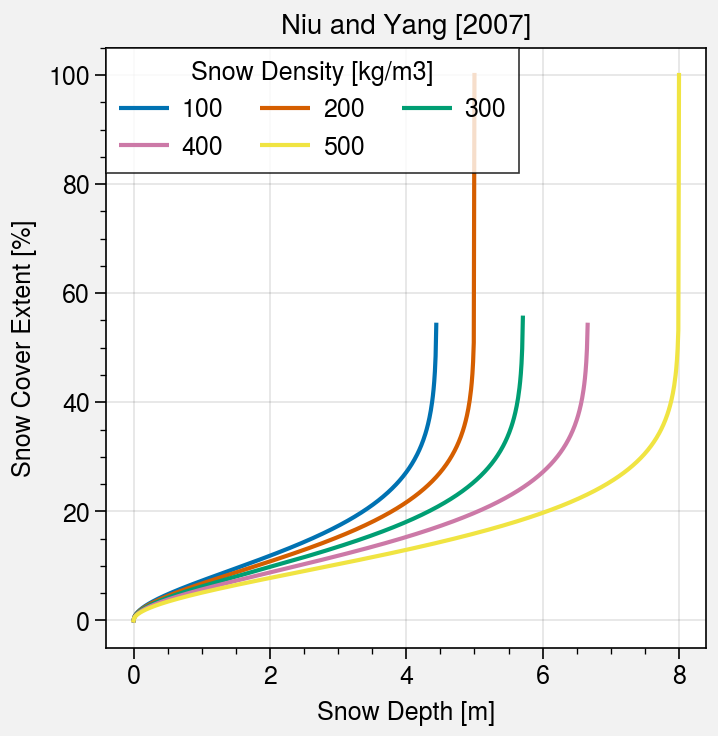

In [178]:
# sigma_topo_list = [1, 10, 100, 200, 500, 1000]
rho_snow_list = plot.arange(100,500,100)


fig, axs = plot.subplots(axwidth=3)

axs.format(
    xlabel='Snow Depth [m]',
    ylabel='Snow Cover Extent [%]',
    title='Niu and Yang [2007]'
)

hs = []
for rho_snow in rho_snow_list:
    y = F_S12_density(d, rho_snow, sigma_topo)*100
    x = d
    h = axs[0].plot(x, y, label=rho_snow)
    hs.append(h)

axs.legend(hs, label='Snow Density [kg/m3]')